In [8]:
# read log files
log_file = "../src/log_20191006-152820.log"
with open(log_file) as lf:
    all_lines = lf.read().split('\n')[1:]

In [9]:
all_lines[:10]

['Training on : train_0.csv, Validating on :val_0.csv',
 'Epoch, Training Loss, Training f-score, Validation Loss, Validation f-score',
 '1, 1.2717, 0.5183, 1.2420, 0.4780',
 '2, 1.2053, 0.5200, 1.2897, 0.4030',
 '3, 1.2432, 0.4723, 1.3016, 0.3846',
 '4, 1.2083, 0.5378, 1.2326, 0.4888',
 '5, 1.1931, 0.5521, 1.1542, 0.5751',
 '6, 1.2067, 0.5601, 1.3299, 0.3620',
 '7, 1.2090, 0.5135, 1.1689, 0.5425',
 '8, 1.1561, 0.5741, 1.2410, 0.4664']

In [10]:
fold_wise_data = [all_lines[2+i*22:22*(i+1)] for i in range(10)]

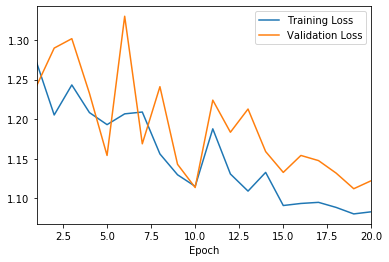

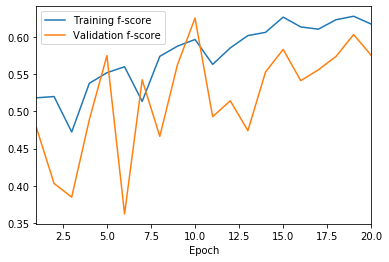

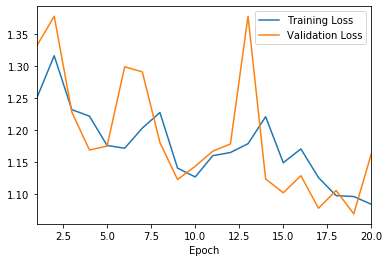

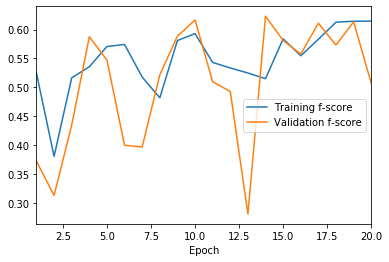

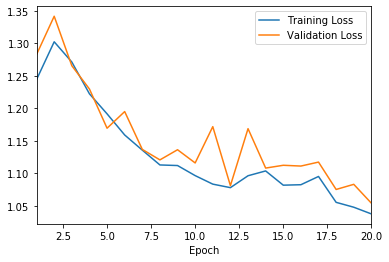

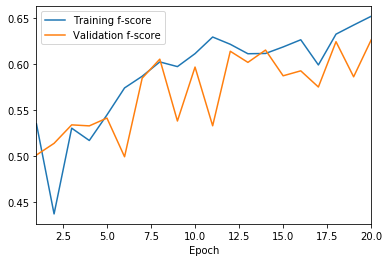

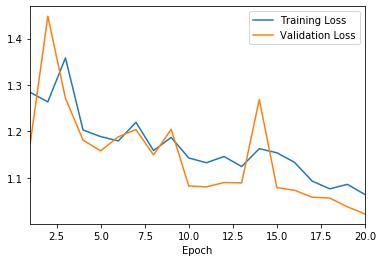

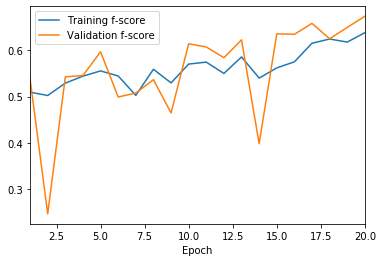

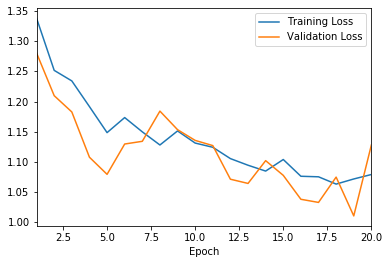

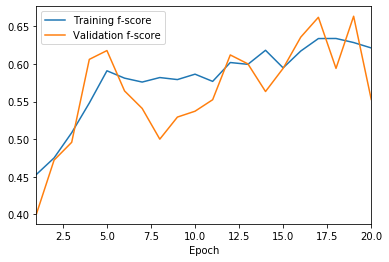

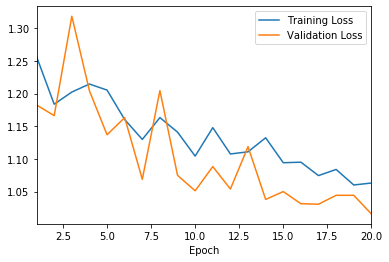

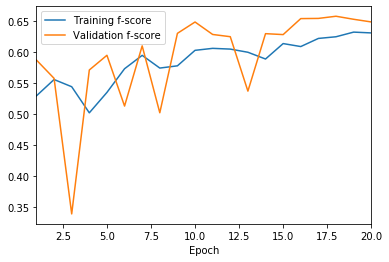

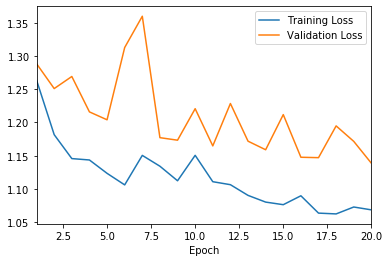

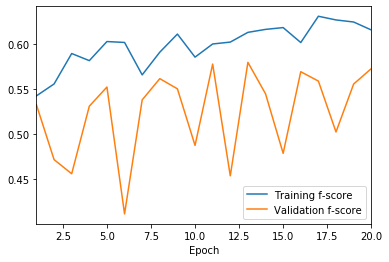

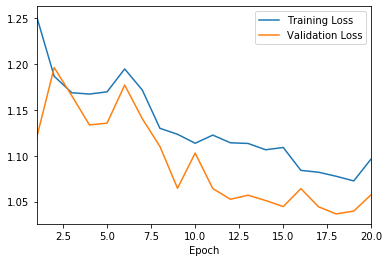

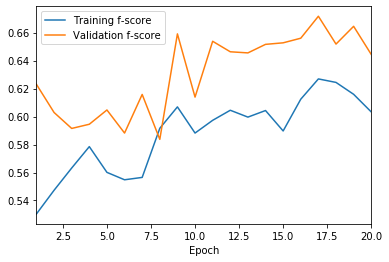

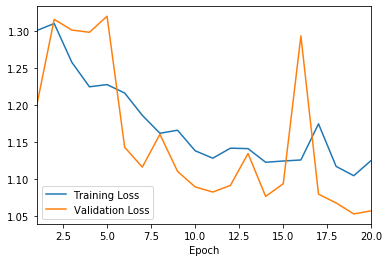

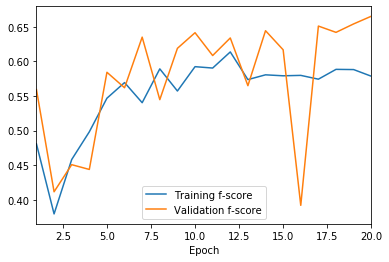

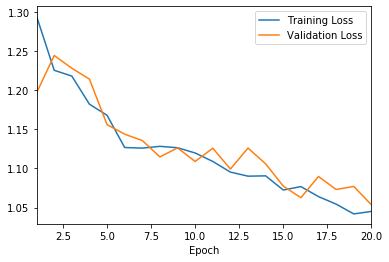

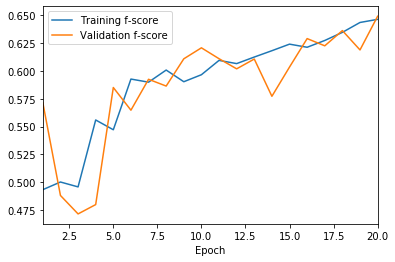

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

# def plot_and_save(i):
for i in range(10):
    df = pd.DataFrame([lines.split(",") for lines in fold_wise_data[i]], columns=['Epoch', 'Training Loss', 'Training f-score', 'Validation Loss', 'Validation f-score'])
    df[['Epoch', 'Training Loss', 'Training f-score', 'Validation Loss', 'Validation f-score']] = df[['Epoch', 'Training Loss', 'Training f-score', 'Validation Loss', 'Validation f-score']].astype(float)
    df.plot(x="Epoch", y=['Training Loss', 'Validation Loss'], kind="line")
    plt.savefig('Loss_{}.png'.format(i))
    df.plot(x="Epoch", y=['Training f-score', 'Validation f-score'], kind="line")
    plt.savefig('F-Score_{}.png'.format(i))
    

In [12]:
epochs = []
tr_loss = []
tr_f = []
val_loss = []
val_f = []

for i in range(10):
    df = pd.DataFrame([lines.split(",") for lines in fold_wise_data[i]], columns=['Epoch', 'Training Loss', 'Training f-score', 'Validation Loss', 'Validation f-score'])
    df[['Epoch', 'Training Loss', 'Training f-score', 'Validation Loss', 'Validation f-score']] = df[['Epoch', 'Training Loss', 'Training f-score', 'Validation Loss', 'Validation f-score']].astype(float)
    epochs.append(df['Epoch'].values)
    tr_loss.append(df['Training Loss'].values)
    tr_f.append(df['Training f-score'].values)
    val_loss.append(df['Validation Loss'].values)
    val_f.append(df['Validation f-score'].values)
len(epochs), len(tr_loss), len(tr_f), len(val_loss), len(val_f)

(10, 10, 10, 10, 10)

In [13]:
import numpy as np
avg_df = pd.DataFrame(np.array([
    np.mean(epochs, axis=0),
    np.mean(tr_loss, axis=0),
    np.mean(tr_f, axis=0),
    np.mean(val_loss, axis=0),
    np.mean(val_f, axis=0)
]).T, columns=['Epoch', 'Training Loss', 'Training f-score', 'Validation Loss', 'Validation f-score'])
avg_df

,Epoch,Training Loss,Training f-score,Validation Loss,Validation f-score
0,1.0,1.27546,0.51160,1.22950,0.51616
1,2.0,1.24263,0.48522,1.28399,0.44800
2,3.0,1.23312,0.52064,1.25318,0.46991
3,4.0,1.19792,0.53979,1.19861,0.53802
4,5.0,1.17920,0.56047,1.16882,0.57985
5,6.0,1.16944,0.57251,1.20816,0.49624
6,7.0,1.16813,0.55432,1.17557,0.55629
7,8.0,1.15008,0.57451,1.16430,0.54075
8,9.0,1.13901,0.58175,1.13096,0.57523
9,10.0,1.12392,0.59225,1.11648,0.60013


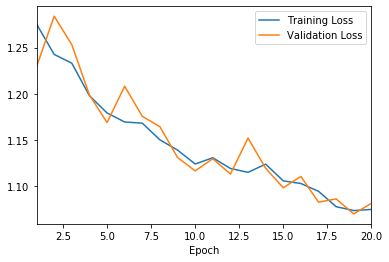

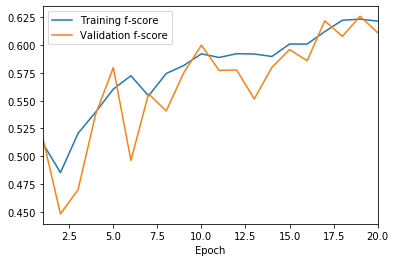

In [14]:
avg_df.plot(x="Epoch", y=['Training Loss', 'Validation Loss'], kind="line")
plt.savefig('Loss_avg.png'.format(i))
avg_df.plot(x="Epoch", y=['Training f-score', 'Validation f-score'], kind="line")
plt.savefig('F-Score_avg.png'.format(i))